<a href="https://colab.research.google.com/github/Kandeo/Core-Week-7/blob/main/Christine_Kandeo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price Predictive Analysis**

**Overview** 

Hass Consulting Company a real estate leader with over 25 years of experience has tasked us to study the factors that affect housing prices using information on real estate properties that was collected over the past few months and create a Predictive Model that allows the company to accurately predict the sale of Housing prices upon being provided with the predictor variables. 

Dataset: http://bit.ly/IndependentProjectWeek7Dataset 

# **Defining the Question**

**Specific Data Analytics Question**

Building a model that predicts the price of a house from the housing data

**Metrics for success**

The model can accurately predict the results between 2 teams based on the features fitted.

**Understanding the Context**

The dataset on results contains results of 40,839 international football matches played starting from 1872 to 2019. The matches are strictly men's full internationals. The Fifa rankings dataset on the other hand capture rankings form 1993 to June 2018.

**Experimental Design**

1. Data Loading
 - Loading Libraries
2. Preprocessing
 - Joining datasets
 - Handling missing/duplicate values
 - Dealing with irrelevant observations
3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis
4. Model Training
 - Label Encoding
 - Polynomial Approach
 - Logistic Approach
5. Conclusions

**Data Relevance**

 - **Date**: Date of Match

 - **Home team**: Name of home team

 - **Away team**: Name of away team

 - **Home score**: Full-time home team score

 - **Away score**: Full time away team score

 - **Tournament**: Name of the tournament

 - **Country**: The Country the match was played

 - **Neutral**: Whether matchwas plaed at a neutral venue

 - **Rank**: Country rank









# **Data Loading**

In [ ]:
#Importing dependencies:
import pandas as pd     #Data Manipulation
import seaborn as sb    #Multi-dimensional arrays  
import seaborn as sns   #EDA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import linear_model
import scipy as sp
from sklearn. metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


# **Preprocessing**

In [ ]:
#Loading and Previewing the Housing dataset:
Housing = pd.read_csv('house_data.csv')
Housing.head(4)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [ ]:
#Checking the shape of the dataset:
Housing.shape


(21613, 20)

In [ ]:
#Checking for any null values:
Housing.isnull().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#Checking for duplicates:
Housing.duplicated().sum()    #3 duplicates identified

#Dropping duplicates:
Housing.drop_duplicates(inplace=True)
Housing.duplicated().sum()

0

# **Exploratory Data Analysis**

1. Univariate Analysis

We perform this analysis with an aim of describing the data and finding patterns that exist within.

 -  Distribution of match Venue

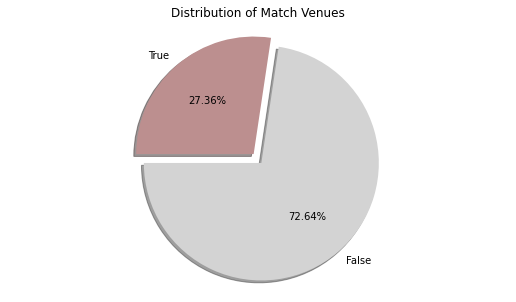

In [ ]:
#To find out the distribution of matches based on whether they were played on neutral grounds or not:
Neutral = Results['neutral'].value_counts()
Neutral
# False: 16,651     True: 6273

#Visualising the information on a pie chart:
labels= ['False','True']
colors=['lightgrey', 'rosybrown']
plt.figure(figsize= (9, 5))
plt.title('Distribution of Match Venues')
plt.pie(Neutral,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()


72.64% of the matches were not played on neutral grounds.

 -  Top Countries where Matches have been played

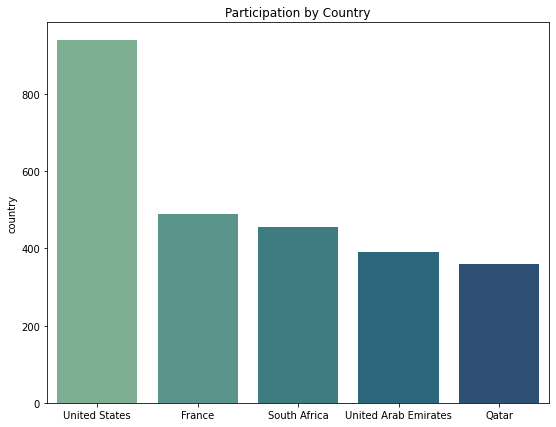

In [ ]:
#Top countries where matched have been played:
Tops = Results.country.value_counts().sort_values(ascending=False).head(5)
Tops
#USA, 939  France 489  South Africa 456  UAE 391  Qatar 360

#Plotting the top participants:
plt.figure(figsize= (9,7))
plt.title('Participation by Country')
sns.barplot(x=Tops.index, y=Tops, palette='crest');


Most Matches have been played in the USA and France

 - Distribution of Tournaments played

In [ ]:
#Viewing the tournamnets with the most games played:
Results['tournament'].value_counts().head(5)


Friendly                                8405
FIFA World Cup qualification            4716
UEFA Euro qualification                 1588
African Cup of Nations qualification    1139
AFC Asian Cup qualification              508
Name: tournament, dtype: int64

Most of the game played were Friendly's followed by Fifa world cup qualifications

In [ ]:
#Viewing the distribution of the data based on the Final scores:
Results['Final_Score'].value_counts()


Win     11150
Loss     6346
Draw     5428
Name: Final_Score, dtype: int64

 -  Distribution of Scores and Ranks

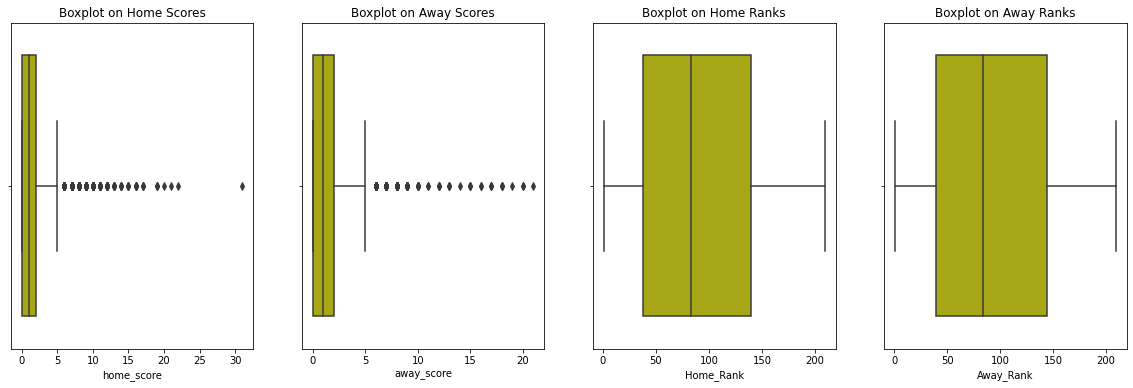

In [ ]:
#Plotting a boxplot on the Scores and ranks:
fig,axes=plt.subplots(1,4, figsize=(20,6))
sns.boxplot(Results.home_score, color='y', ax=axes[0])
sns.boxplot(Results.away_score, color='y', ax=axes[1])
sns.boxplot(Results.Home_Rank, color='y', ax=axes[2])
sns.boxplot(Results.Away_Rank, color='y', ax=axes[3])
axes[0].set_title('Boxplot on Home Scores')
axes[1].set_title('Boxplot on Away Scores')
axes[2].set_title('Boxplot on Home Ranks')
axes[3].set_title('Boxplot on Away Ranks')
plt.show()


From the plots, outliers exist in the home and away scores. Since this are actual scores scored in the respective matches, none is dropped.

 - Descriptive Summary

In [ ]:
#A descriptive summary of the numerical variables:
Results.describe()

,home_score,away_score,Year,Home_Rank,Away_Rank
count,22924.000000,22924.000000,22924.000000,22924.000000,22924.000000
mean,1.651239,1.099503,2006.732551,87.308541,88.854563
std,1.705907,1.350143,7.196682,54.715817,55.157548
min,0.000000,0.000000,1993.000000,1.000000,1.000000
25%,0.000000,0.000000,2001.000000,38.000000,40.000000
50%,1.000000,1.000000,2007.000000,83.000000,84.000000
75%,2.000000,2.000000,2013.000000,140.000000,144.000000
max,31.000000,21.000000,2019.000000,209.000000,209.000000


Findings and Recommendations;
- Most games were not played in neutral grounds.
- Further analysis to be done to establish if there is any relationship between the variables.

2. Bivariate Analysis

This analysis is conducted with an aim of determining whether a statistical association exists between any two variables in the dataset.

 - Correlation Test

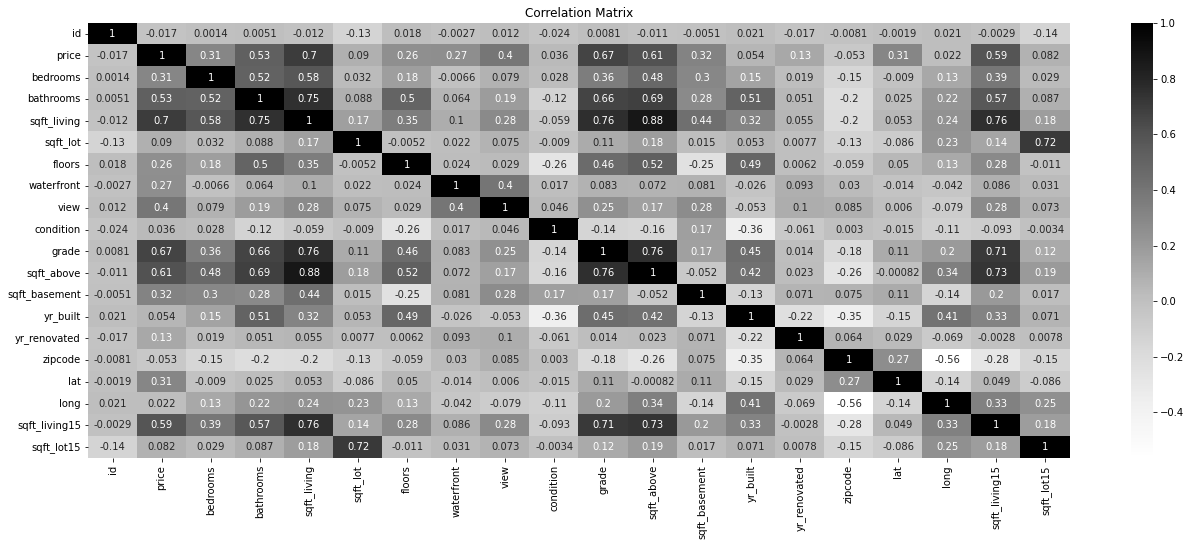

In [ ]:
#To check for correlation between the variables:
plt.figure(figsize = (22, 8))
Corr = Housing.corr()
sns.heatmap(Corr, cmap = 'Greys', annot = True)
plt.title('Correlation Matrix')
plt.show()

From the matrix, no linear relationship exists between the numerical variables in the dataset

Findings and Recommendations;
 - From the correlation matrix,none of the input variables are linearly related. This validates their selection as they wont bear a negative impact on the regression analysis

# **Model Training**

In [ ]:
#Picking columns relevant for Building the models:
Model = Results[['home_team','away_team','home_score', 'away_score', 'tournament', 'Year', 'Home_Rank', 'Away_Rank', 'Final_Score']].copy()
Model.tail(4)


,home_team,away_team,home_score,away_score,tournament,Year,Home_Rank,Away_Rank,Final_Score
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019,165,143,Draw
40836,Senegal,Algeria,0,1,African Cup of Nations,2019,27,66,Loss
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019,119,155,Loss
40838,Papua New Guinea,Fiji,1,1,Pacific Games,2019,166,165,Draw


In [ ]:
#Coding the Labels to a machine readable format:
le = LabelEncoder()
Model['home_team'] = le.fit_transform (Model['home_team'])
Model['away_team'] = le.fit_transform (Model['away_team'])
Model['tournament'] = le.fit_transform (Model['tournament'])
Model['Final_Score'] = le.fit_transform (Model['Final_Score'])


In [ ]:
#Viewing the data after labelling:
Model.head(4)

,home_team,away_team,home_score,away_score,tournament,Year,Home_Rank,Away_Rank,Final_Score
17915,31,275,3,1,31,1993,59,22,2
17916,35,164,1,1,33,1993,8,14,0
17917,79,279,5,0,31,1993,35,94,2
17918,113,229,1,0,33,1993,65,86,2


In [ ]:
#Training with data on information till 2018 as the rankings on the Fifa dataset was till 7th June 2018:
MODEL = Model[Model.Year<= 2018]
MODEL.shape

(22436, 9)

# **Polynomial Approach**

In [ ]:
#Creating the dataframe to be used on the Polynomial Approach:
Polynomial = MODEL[['home_team','away_team','home_score', 'away_score' ,'tournament', 'Home_Rank', 'Away_Rank']].copy()
Polynomial.head(4)

,home_team,away_team,home_score,away_score,tournament,Home_Rank,Away_Rank
17915,31,275,3,1,31,59,22
17916,35,164,1,1,33,8,14
17917,79,279,5,0,31,35,94
17918,113,229,1,0,33,65,86


**Multicollinearity**

Multiple correlations of sufficient magnitude can have the potential of adversely affecting regression estimates. For this, a check needs to be done to avoid a bias  or inflation of standard errors

In [ ]:
#Checking for multicollinearity on the independent varibles through correlation:
Cor = Polynomial.corr()
Cor


,home_team,away_team,home_score,away_score,tournament,Home_Rank,Away_Rank
home_team,1.000000,0.000325,0.016357,-0.024748,-0.023951,0.025722,0.029590
away_team,0.000325,1.000000,-0.037530,0.022180,-0.009656,0.031414,0.012212
home_score,0.016357,-0.037530,1.000000,-0.165442,-0.015513,-0.059304,0.262546
away_score,-0.024748,0.022180,-0.165442,1.000000,0.022501,0.183323,-0.091565
tournament,-0.023951,-0.009656,-0.015513,0.022501,1.000000,-0.156780,-0.169091
Home_Rank,0.025722,0.031414,-0.059304,0.183323,-0.156780,1.000000,0.443923
Away_Rank,0.029590,0.012212,0.262546,-0.091565,-0.169091,0.443923,1.000000


From the matrix table the highest corelation is of 0.44 between Home rank and Away Rank. This is not considered strong to affect the analysis

In [ ]:
#Another way of Checking for multicollinearity is through the Variance Inflation Factor
#The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.
# 1 - Not correlated    1-5 - Moderately correlated   5 - Highly correlated
#Testing on the independent variables:
pd.DataFrame(np.linalg.inv(Cor.values), index = Cor.index, columns=Cor.columns)


,home_team,away_team,home_score,away_score,tournament,Home_Rank,Away_Rank
home_team,1.002168,-0.000245,-0.010278,0.025972,0.017696,-0.023397,-0.011196
away_team,-0.000245,1.002566,0.037883,-0.013722,0.005136,-0.019805,-0.013778
home_score,-0.010278,0.037883,1.133816,0.112282,-0.016400,0.214268,-0.385448
away_score,0.025972,-0.013722,0.112282,1.089484,-0.034599,-0.282794,0.189367
tournament,0.017696,0.005136,-0.016400,-0.034599,1.039932,0.111452,0.126918
Home_Rank,-0.023397,-0.019805,0.214268,-0.282794,0.111452,1.383595,-0.676579
Away_Rank,-0.011196,-0.013778,-0.385448,0.189367,0.126918,-0.676579,1.440846


The more the VIF increases, the less reliable the regression results will be. A VIF above 10 indicates high correlation and is cause for concern. 
From the table, none of the variables has a value higher than 5, hence the data is appropriate for model training

**Model 1**: Goals Home Team Scores

In [ ]:
#Picking Observations needed for the model:
Model1 = Polynomial[['home_team','away_team','home_score' ,'away_score', 'tournament', 'Home_Rank', 'Away_Rank']].copy()
Model1.head(4)

,home_team,away_team,home_score,away_score,tournament,Home_Rank,Away_Rank
17915,31,275,3,1,31,59,22
17916,35,164,1,1,33,8,14
17917,79,279,5,0,31,35,94
17918,113,229,1,0,33,65,86


In [ ]:
#Creating the Variables:
X = Model1[['home_team', 'away_team', 'tournament', 'Home_Rank', 'Away_Rank']]
y = Model1['home_score']

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17948, 5) (4488, 5) (17948,) (4488,)


To see if the model improves, we shall test it with a 3 and 5 degree of freedom.

3 degrees of freedom

In [ ]:
#Performing feature scaling:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
#using 3 degrees of freedom:
model = PolynomialFeatures(degree = 3) 

#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)


In [ ]:
#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y in the train test:
Reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Predicting in the test set:
y_pred = Reg.predict(X_test)

In [ ]:
#Printing the metrics performance:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y_test, y_pred ))

Mean Absolute Error (MAE): 1.129319308243592
Mean Squared Error (MSE): 2.7003859655634703
Root Mean Squared Error (RMSE) : 1.6432851138994324
Coefficient  of Determination (R^2): 0.132


5 degrees of freedom

In [ ]:
#Creating the Variables:
X = Model1[['home_team', 'away_team', 'tournament', 'Home_Rank', 'Away_Rank']].values
y = Model1['home_score'].values

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17948, 5) (4488, 5) (17948,) (4488,)


In [ ]:
#Performing feature scaling:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
#using 5 degrees of freedom:
model = PolynomialFeatures(degree = 5) 

#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

In [ ]:
#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y in the train test:
Reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Predicting in the test set:
y_pred = Reg.predict(X_test)

In [ ]:
#Printing the metrics performance:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y_test, y_pred ))

#RMSE value ≥0.5 reflects the poor ability of the model to accurately predict the data.

Mean Absolute Error (MAE): 1.1255385919179772
Mean Squared Error (MSE): 2.6684975226216094
Root Mean Squared Error (RMSE) : 1.6335536485287556
Coefficient  of Determination (R^2): 0.142


From the metrics above, no major improvement happens when the degree of freedom is increased from 3 to 5. The RMSE for both stands at 1.6

Conclusions:
 
 A lower value of RMSE and a higher value of R^2 indicate a good model fit for the prediction. 
 
 Being that there is no fixed threshold limit for RMSE, whenever the value is soo small or close to 0, the learning rate and the learning quality is high hence indications of  a better model. 
 
 Since the RMSE tells how concentrated the data is along the line of best fit, the value of 1.6 might deem the model as not reliable.



**Cross-Validation**

In [ ]:
#Using K-fold to perform cross-validation to estimate the skill of the machine learning model on unseen data:

#Creating the Variables:
X = Model1[['home_team', 'away_team', 'tournament', 'Home_Rank', 'Away_Rank']].values
y = Model1['home_score'].values

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 1

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.5941442079704264

Training model 2
Model 2 Root Mean Squared Error: 1.865962710239574

Training model 3
Model 3 Root Mean Squared Error: 1.541107057851204

Training model 4
Model 4 Root Mean Squared Error: 1.5398331071315745

Training model 5
Model 5 Root Mean Squared Error: 1.4808138725810374


In [ ]:
#Comparing the average RMSES from the 5 training models:
np.mean(RMSES)

1.6043721911547633

The average of the 5 models is fairly close to the initial value of 1.63. 
However, it might be worthwile to pick model 5 instead as it has the lowest RMSE


**Residual plots**


In [ ]:
#To find the residual mean:
residuals = np.subtract(y_pred, y_test)

#Describe the residual:
pd.DataFrame(residuals).describe()
residuals.mean()

0.15701605988389056

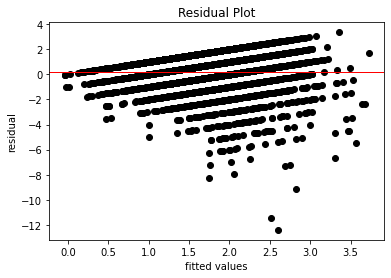

In [ ]:
#Plotting the residual plot: 
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residual Plot')
plt.show()

 - A clear pattern exists in the plot showing signs of non-linearity in the data.
 - The plots signifies that we have not completely captured the predictive information of the data in our model hence model is not a good predictor

**Bartlett's Test (heteroskedasticity testing)**

In [ ]:
#Using Barlett test to test if the variances are equal for all samples:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


the variances are homogeneous!


The test checks that the assumption of equal variances is true before running certain statistical tests. 

From the test, the variances are homogeneous hence equal and the model does not need futher assessment

**Model 2**: Goals Away Team Scores

In [ ]:
#Picking Observations needed for the model:
Model2 = Polynomial[['home_team','away_team','home_score', 'away_score' ,'tournament', 'Home_Rank', 'Away_Rank']].copy()
Model2.head(4)

,home_team,away_team,home_score,away_score,tournament,Home_Rank,Away_Rank
17915,31,275,3,1,31,59,22
17916,35,164,1,1,33,8,14
17917,79,279,5,0,31,35,94
17918,113,229,1,0,33,65,86


Performing a similar process for the second model:

In [ ]:
#Creating the Variables:
X = Model2[['home_team', 'away_team', 'tournament', 'Home_Rank', 'Away_Rank']]
y = Model2['away_score']

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17948, 5) (4488, 5) (17948,) (4488,)


3 degrees of freedom

In [ ]:
#Performing feature scaling:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
#using 3 degrees of freedom:
model = PolynomialFeatures(degree = 3) 

#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

In [ ]:
#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y in the train test:
Reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Predicting in the test set:
y_pred = Reg.predict(X_test)

In [ ]:
#Printing the metrics performance:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y_test, y_pred ))

Mean Absolute Error (MAE): 0.9184685756825375
Mean Squared Error (MSE): 1.6073649997257264
Root Mean Squared Error (RMSE) : 1.267818993281662
Coefficient  of Determination (R^2): 0.100


5 degrees of freedom

In [ ]:
#Creating the Variables:
X = Model2[['home_team', 'away_team', 'tournament', 'Home_Rank', 'Away_Rank']]
y = Model2['away_score']

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17948, 5) (4488, 5) (17948,) (4488,)


In [ ]:
#Performing feature scaling:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
#using 5 degrees of freedom:
model = PolynomialFeatures(degree = 5) 

#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

In [ ]:
#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y in the train test:
Reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicting in the test set:
y_pred = Reg.predict(X_test)

In [ ]:
#Printing the metrics performance:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y_test, y_pred ))

Mean Absolute Error (MAE): 0.9182957128387317
Mean Squared Error (MSE): 1.603553533627419
Root Mean Squared Error (RMSE) : 1.2663149425113087
Coefficient  of Determination (R^2): 0.102


Both degrees yield an RMSE of 1.27. Similar to the first model, an RMSE close to zero and R-Square approaching 1 are indicative of high accuracy between observed and predicted values hence the model may not be a good predictor

**Cross-Validation**

In [ ]:
#Using K-fold to perform cross-validation to estimate the skill of the machine learning model on unseen data:

#Creating the Variables:
X = Model1[['home_team', 'away_team', 'tournament', 'Home_Rank', 'Away_Rank']].values
y = Model1['away_score'].values

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 1

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.295617660189613

Training model 2
Model 2 Root Mean Squared Error: 1.3137225800521086

Training model 3
Model 3 Root Mean Squared Error: 1.270271767996328

Training model 4
Model 4 Root Mean Squared Error: 1.299689998222034

Training model 5
Model 5 Root Mean Squared Error: 1.2931493134161045


In [ ]:
#Comparing the average RMSES from the 5 training models:
np.mean(RMSES)

1.2944902639752376

The average of the 5 models is fairly close to the initial value of 1.27. 
However, it might be worthwile to pick model 3 instead as it has the lowest RMSE


**Residual Plot**

In [ ]:
#To find the residual mean:
residuals = np.subtract(y_pred, y_test)

#Describe the residual:
pd.DataFrame(residuals).describe()
residuals.mean()

0.009298511421383604

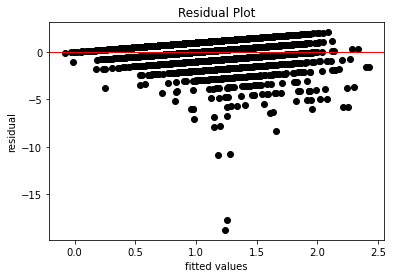

In [ ]:
#Plotting the residual plot: 
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residual Plot')
plt.show()

A good model is one with no direction, shape, patterns or bends. From the plot above, the Model can be deemed as not being a good predictor. 

The model either needs improvement or the dataset is probably not a good fit for regression

**Bartlett's Test (heteroskedasticity testing)**

In [ ]:
#Using Barlett test to test if the variances are equal for all samples:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


the variances are homogeneous!


The variances are equal hence no need for further assessments

Conclusion:
- From the Models, the various metrics and plots created indicate that the approach did not yield a good predictor model.
- Ways to improve it is either increase the number of input features or explore more classifiers

# **Logistic Approach**

In [ ]:
#Creating the dataframe to be used:
Logistic = MODEL[['home_team','away_team','home_score', 'away_score' ,'tournament','Year', 'Home_Rank', 'Away_Rank', 'Final_Score']].copy()
Logistic.head(4)

,home_team,away_team,home_score,away_score,tournament,Year,Home_Rank,Away_Rank,Final_Score
17915,31,275,3,1,31,1993,59,22,2
17916,35,164,1,1,33,1993,8,14,0
17917,79,279,5,0,31,1993,35,94,2
17918,113,229,1,0,33,1993,65,86,2


In [ ]:
#Assigning the Variables:
X = Logistic.drop("Final_Score",axis=1)
y = Logistic["Final_Score"]

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [ ]:

#Performing feature scaling:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
model = LogisticRegression()

#Fitting the model:
model.fit(X_train,y_train )


LogisticRegression()

Model Evaluation

In [ ]:
#Checking the accuracy of the model:
print("Accuracy:",model.score(X_test, y_test )* 100)

Accuracy: 100.0


In [ ]:
#Predicting the value:
predictions = model.predict(X_test)

#Checking precision:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1023
           1       1.00      1.00      1.00      1248
           2       1.00      1.00      1.00      2217

    accuracy                           1.00      4488
   macro avg       1.00      1.00      1.00      4488
weighted avg       1.00      1.00      1.00      4488



In [ ]:
#Using Confusion Matrix:
confusion_matrix(y_test, predictions)

array([[1023,    0,    0],
       [   0, 1248,    0],
       [   0,    0, 2217]])

From the 3 metrics used for evaluation, the model accurately predicted all the observations on the testing dataset

**Hyperparameter Tuning**

Performing the same process by choosing a set of optimal hyperparameters:

In [ ]:
#Choosing an optimal parameter by using a model argument whose value is set before the training process begins:
clf = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2'], 
               'C': np.logspace(0, 4, 5),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
               'max_iter' : [5, 10]
               }
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

# Fitting grid search
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)


In [ ]:
#Checking the accuracy and the best hyperparameter:
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
print('Best Solver:', best_clf.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_clf.best_estimator_.get_params()['max_iter'])

Best Penalty: l1
Best C: 1.0
Best Solver: saga
Best max_iter: 5


In [ ]:
#Model Selection using the Above parameters:
model = LogisticRegression(penalty='l1', C=1, max_iter=5, solver='saga')

#Fitting the model:
model.fit(X_train,y_train )

LogisticRegression(C=1, max_iter=5, penalty='l1', solver='saga')

In [ ]:
#Checking the accuracy of the model:
#predictions = model.predict(X_test)
print("Accuracy:",model.score(X_test, y_test )* 100)

Accuracy: 100.0


The process of hyperparameter tuning eliminates chances of overfitting and underfitting since the optimal point is being sort in the model.
  The accuracy score of 100% depicts the model as being a good predictor

**Conclusion**

From the 2 Approaches, Logistic Regression Model is the best in predicting the results of a game.

The features provided were sufficient enough to provide the needed output.
